
# Digital Image Processing — Lecture 04 Code
**Local Enhancement via Spatial Filtering**  

This notebook walks through the core ideas and implementations from the lecture using **NumPy** and **pure Python** implementations (no built‑in cv2 filtering).  
We only use **OpenCV (`cv2`) for reading images** and **Matplotlib** for visualization.

> Topics covered
- Spatial filtering (correlation vs. convolution)  
- Padding strategies (zero & replicate)  
- Smoothing filters (box & Gaussian)  
- Order‑statistic filters (median, min, max)  
- Sharpening via spatial differentiation (first & second order)  
- Laplacian (with/without diagonals) & Laplacian sharpening  
- Gradient‑based edge detection (Roberts, Prewitt, Sobel)  
- Practical comparisons & visual demos

*Tip:* Run the notebook top‑to‑bottom. Each section has short notes and formulas to revise the slides.


## Import Libraries

In [1]:
import cv2
import numpy as np
from matplotlib import pylab as plt

## Spatial Filtering
### Correlation
Moving the center of a kernel over an image, and computing the sum of products at each location


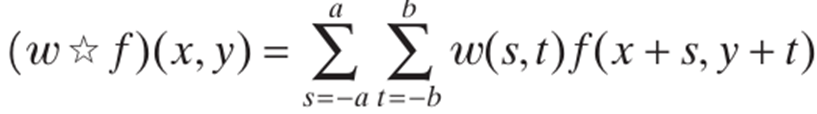

𝑎=(𝑚−1)/2       𝑏=(𝑛−1)/2

Text(0.5, 1.0, 'Correlation Kernel')

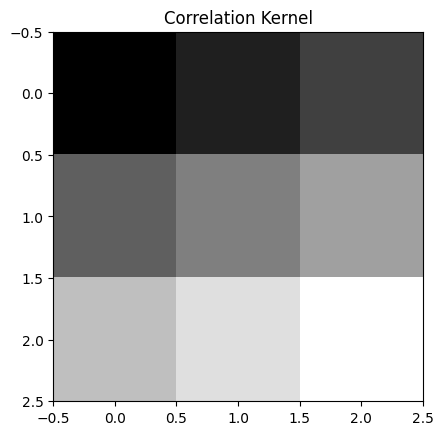

In [39]:
# First define the kernel
cor_kernel = np.array([[1,2,3],
                       [4,5,6],
                       [7,8,9]])
# Convert these values into 0-255 range
cor_kernel = ((cor_kernel / 9) * 255).astype(np.uint8)

# Plot the kernel
plt.imshow(cor_kernel, cmap='gray')
plt.title('Correlation Kernel')

Now we will create an impulse image to perform the correlation operation on.

>Note: Impluse Image have all zeros except centre, which is 1 or 255

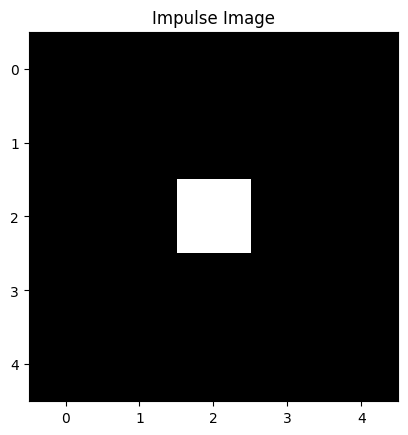

In [ ]:
# Create a 5x5 array of zeros
impulse_image = np.zeros((5, 5))

# Set the center element to 1
impulse_image[2, 2] = 1

# Display the image
plt.imshow(impulse_image, cmap='gray')
plt.title('Impulse Image')
plt.show()

Now we will perform correlation operation

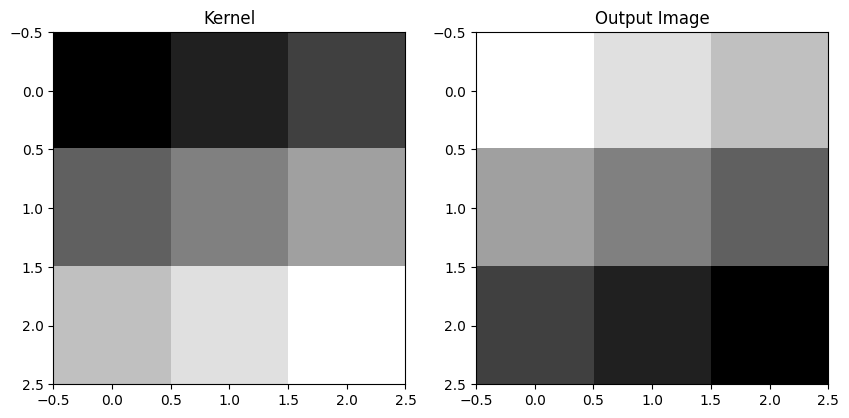

In [ ]:
kernel = cor_kernel
image = impulse_image

# We'll not be using padding for now, as the image border is just zero pixels
# This operation will decrease the size of the output image, new size will be (3,3)
output = np.zeros((3,3))

rows = output.shape[0]
cols = output.shape[1]

for row in range(rows):
    for col in range(cols):
        loc_region = image[row : row + 3, col : col + 3]
        result = np.sum(loc_region * kernel) # Sum of Products
        output[row, col] = result


# Show the kernel and output image
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the kernel
axes[0].imshow(kernel, cmap='gray')
axes[0].set_title("Kernel")

# Display the output image
axes[1].imshow(output, cmap='gray')
axes[1].set_title("Output Image")

# Show the plot
plt.show()


### Convolution
Moving 180" rotated kernel over an image, and computing the sum of products at each location.


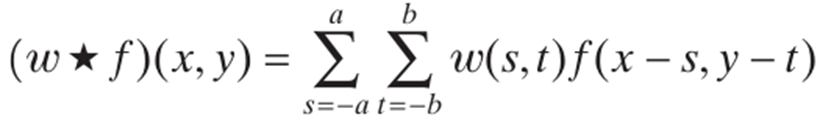

𝑎=(𝑚−1)/2      𝑏=(𝑛−1)/2


Here the formula is slightly different. The minus “ - ” sign rotates the kernel by 180 degree.


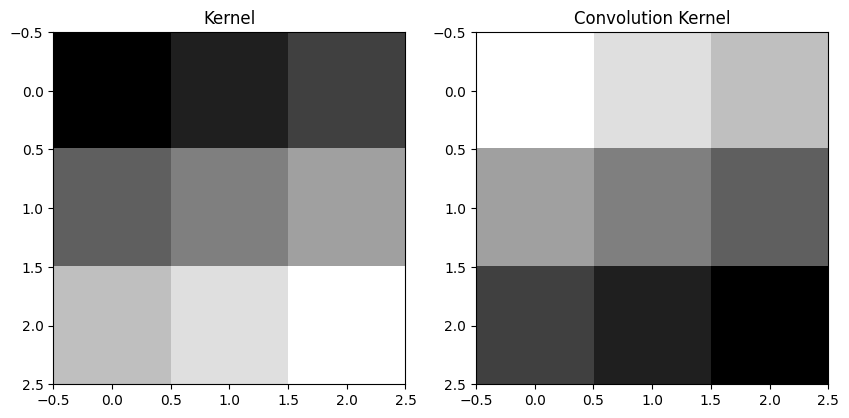

In [40]:
orig_kernel = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9]
])

orig_kernel = ((orig_kernel / 9) * 255).astype(np.uint8)

con_kernel = np.flipud(np.fliplr(orig_kernel)) 
# np.fliplr() flips the array horizontally (left to right)
# np.flipud() flips the array vertically (up to down).
# Combining both achieves a 180-degree rotation.

# Show the kernel and con kernel
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the kernel
axes[0].imshow(orig_kernel, cmap='gray')
axes[0].set_title("Kernel")

# Display the output image
axes[1].imshow(con_kernel, cmap='gray')
axes[1].set_title("Convolution Kernel")

# Show the plot
plt.show()

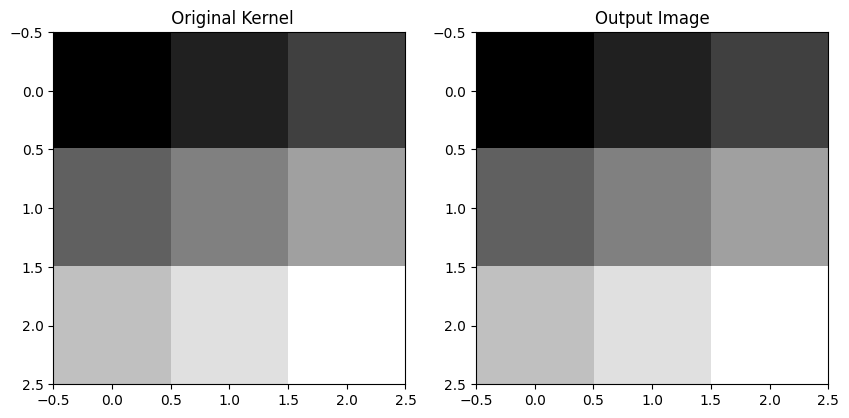

In [28]:
# Use the same impulse image
image = impulse_image
kernel = con_kernel

output = np.zeros((3,3))

rows = output.shape[0]
cols = output.shape[1]

for row in range(rows):
    for col in range(cols):
        loc_region = image[row : row + 3, col : col + 3]
        result = np.sum(loc_region * kernel) # Sum of Products
        output[row, col] = result


# Show the kernel and output image
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the kernel
axes[0].imshow(orig_kernel, cmap='gray')
axes[0].set_title(" Original Kernel")

# Display the output image
axes[1].imshow(output, cmap='gray')
axes[1].set_title("Output Image")

# Show the plot
plt.show()

### Using both kernels on same image

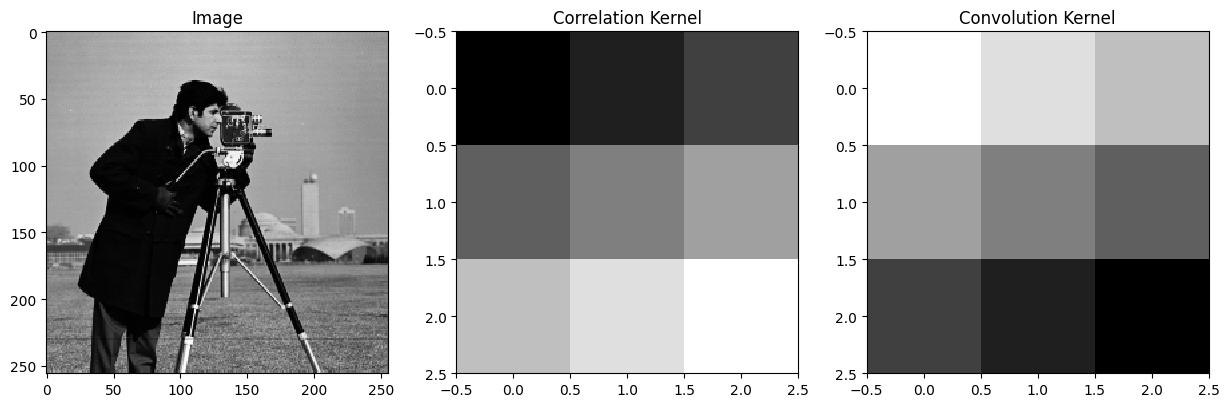

In [99]:
image = cv2.imread('Fig0222(b)(cameraman).tif', cv2.IMREAD_GRAYSCALE)


# Show Image, Correlation Kernel and Convolution Kernel
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Display the image
axes[0].imshow(image, cmap='gray', interpolation='nearest')
axes[0].set_title("Image")

# Display the correlation kernel
axes[1].imshow(cor_kernel, cmap='gray', interpolation='nearest')
axes[1].set_title("Correlation Kernel")

# Display the convolution kernel
axes[2].imshow(con_kernel, cmap='gray', interpolation='nearest')
axes[2].set_title("Convolution Kernel")

# Show the plot
plt.show()

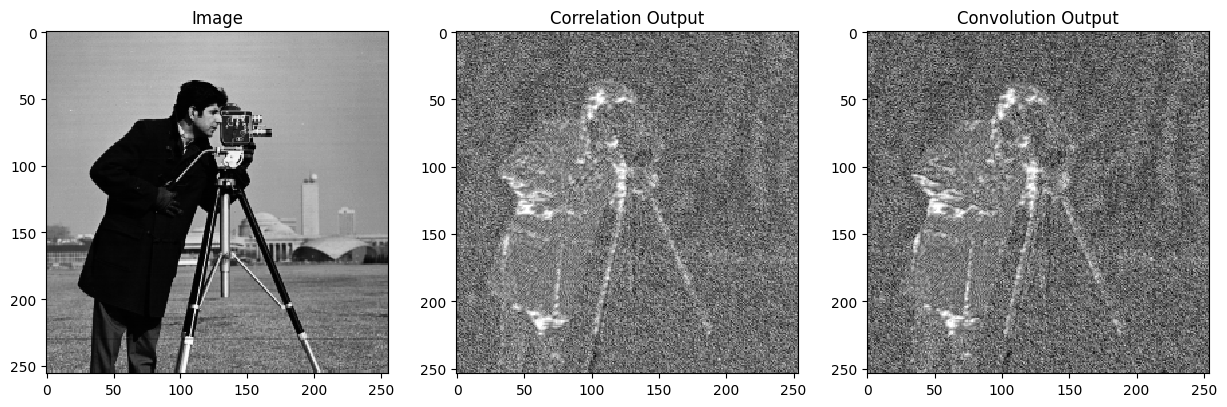

In [100]:
# Correlation Operation

cor_output = np.zeros((254,254)).astype('uint')
con_output = np.zeros((254,254)).astype('uint')

rows = cor_output.shape[0]
cols = cor_output.shape[1]

for row in range(rows):
    for col in range(cols):
        loc_region = image[row : row + 3, col : col + 3]

        cor_result = np.sum(loc_region * cor_kernel) # Sum of Products
        con_reult =  np.sum(loc_region * con_kernel)

        cor_output[row, col] = cor_result
        con_output[row, col] = con_reult

# Showing the result
# Show Image, Correlation Kernel and Convolution Kernel
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Display the image
axes[0].imshow(image, cmap='gray', interpolation='nearest')
axes[0].set_title("Image")

# Display the correlation kernel
axes[1].imshow(cor_output, cmap='gray', interpolation='nearest')
axes[1].set_title("Correlation Output")

# Display the convolution kernel
axes[2].imshow(con_output, cmap='gray', interpolation='nearest')
axes[2].set_title("Convolution Output")

# Show the plot
plt.show()


## Padding strategies (zero & replicate)

As you have noticed, when we create the output, its size decreases because convolution/correlation reduces the image size by:

$$
M_m = M - m + 1 \\
N_n = N - n + 1 
$$
where,
* $M$ is the number of rows of the image.
* $N$ is the number of columns of the image.
* $m$ is the number of rows of the kernel.
* $n$ is the number of columns of the kernel.
* $M_m$ represents the number of rows of the new output image.
* $N_n$ represents the number of columns of the new output image.

We also encounter another issue: we are unable to process the edge pixels by placing the kernel center on them.

To resolve this issue, padding will help. It allows us to keep the output image shape the same as the input and also helps in processing the edge pixels of the input image.

Padding formula:

$$
p_m = (m - 1)/2 \\
p_n = (n - 1)/2
$$

### Zero padding


In [109]:
image = np.array([[5, 2, 3, 8, 5, 6, 9, 7],
                [1, 7, 8, 5, 6, 3, 4, 9],
                [4, 9, 6, 1, 4, 8, 5, 2],
                [7, 3, 2, 6, 7, 9, 1, 4],
                [3, 8, 9, 3, 1, 2, 8, 7],
                [4, 1, 6, 8, 5, 3, 9, 2],
                [2, 6, 3, 7, 9, 1, 4, 5],
                [3, 5, 4, 2, 6, 8, 7, 3]])

kernel = np.array([
    [1,0,-1],
    [1,0,-1],
    [1,0,-1]
])

In [ ]:
# Manual padding
m = kernel.shape[0]
n = kernel.shape[1]

p_m = (m - 1) // 2
p_n = (n - 1) // 2

rows = image.shape[0]
cols = image.shape[1]

padded_image = np.zeros((rows + 2, cols + 2))
padded_image[1:-1, 1:-1] = image
padded_image

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 5., 2., 3., 8., 5., 6., 9., 7., 0.],
       [0., 1., 7., 8., 5., 6., 3., 4., 9., 0.],
       [0., 4., 9., 6., 1., 4., 8., 5., 2., 0.],
       [0., 7., 3., 2., 6., 7., 9., 1., 4., 0.],
       [0., 3., 8., 9., 3., 1., 2., 8., 7., 0.],
       [0., 4., 1., 6., 8., 5., 3., 9., 2., 0.],
       [0., 2., 6., 3., 7., 9., 1., 4., 5., 0.],
       [0., 3., 5., 4., 2., 6., 8., 7., 3., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [112]:
# Padding using numpy
padded_image = np.pad(image, (p_m, p_n))
padded_image

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 5, 2, 3, 8, 5, 6, 9, 7, 0],
       [0, 1, 7, 8, 5, 6, 3, 4, 9, 0],
       [0, 4, 9, 6, 1, 4, 8, 5, 2, 0],
       [0, 7, 3, 2, 6, 7, 9, 1, 4, 0],
       [0, 3, 8, 9, 3, 1, 2, 8, 7, 0],
       [0, 4, 1, 6, 8, 5, 3, 9, 2, 0],
       [0, 2, 6, 3, 7, 9, 1, 4, 5, 0],
       [0, 3, 5, 4, 2, 6, 8, 7, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

### Replicate Padding using numpy

In [114]:
padded_image = np.pad(image, (p_m, p_n), mode = 'edge')
padded_image

array([[5, 5, 2, 3, 8, 5, 6, 9, 7, 7],
       [5, 5, 2, 3, 8, 5, 6, 9, 7, 7],
       [1, 1, 7, 8, 5, 6, 3, 4, 9, 9],
       [4, 4, 9, 6, 1, 4, 8, 5, 2, 2],
       [7, 7, 3, 2, 6, 7, 9, 1, 4, 4],
       [3, 3, 8, 9, 3, 1, 2, 8, 7, 7],
       [4, 4, 1, 6, 8, 5, 3, 9, 2, 2],
       [2, 2, 6, 3, 7, 9, 1, 4, 5, 5],
       [3, 3, 5, 4, 2, 6, 8, 7, 3, 3],
       [3, 3, 5, 4, 2, 6, 8, 7, 3, 3]])

## Smoothing Filters
### Box Filter

Replaces each pixel with the average of its neighboring pixels. All values of the filter must be same

For Image M 𝑥 N,   Filter m 𝑥 n:


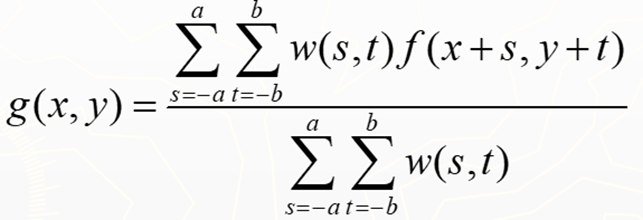

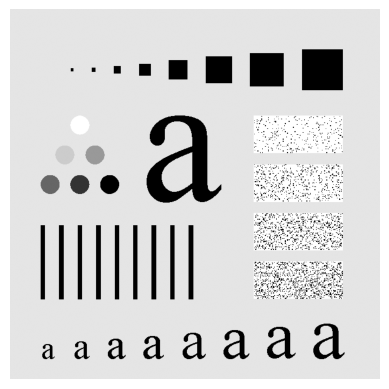

In [185]:
kernel = np.ones((3,3))
image = cv2.imread('Fig0237(a)(characters test pattern)_POST.tif', cv2.IMREAD_GRAYSCALE)

plt.imshow(image, 'gray')
plt.axis('off')
plt.show()


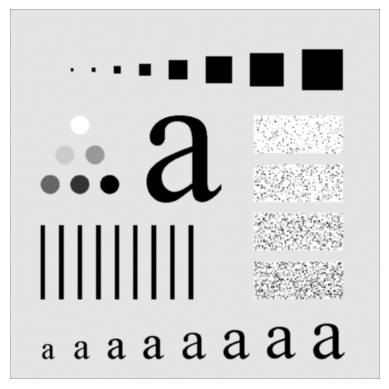

In [186]:
m, n = kernel.shape
p_m, p_n = (m - 1) // 2, (n - 1) // 2

padded_image = np.pad(image, p_m) # zero padding

output_image1 = np.zeros_like(image)
rows, cols = image.shape

for row in range(rows):
    for col in range(cols):
        loc_region = padded_image[row: row + m, col: col + n]
        product = kernel * loc_region
        average = np.sum(product) / (m * n) # we can also use np.mean for averaging as smoothin filter do.
        output_image1[row, col] = average

plt.imshow(output_image1, cmap = 'gray')
plt.axis('off')
plt.show()

**Using 11 x 11 box filter** <br>
The blurrness will increase.

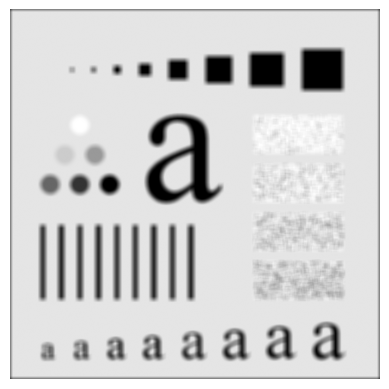

In [187]:
kernel = np.ones((11,11)) # We can also normalize the kernel here which we skip the "mean" step

m, n = kernel.shape
p_m, p_n = (m - 1) // 2, (n - 1) // 2

padded_image = np.pad(image, p_m) # zero padding

output_image2 = np.zeros_like(image)
rows, cols = image.shape

for row in range(rows):
    for col in range(cols):
        loc_region = padded_image[row: row + m, col: col + n]
        product = kernel * loc_region
        average = np.mean(product)
        output_image2[row, col] = average

plt.imshow(output_image2, cmap = 'gray')
plt.axis('off')
plt.show()

**Using 21 x 21 Box Filter** <br>
Blurrness will increase by furthur degree. <br>
Look closely at the borders, the darkness is increasing due to zero padding

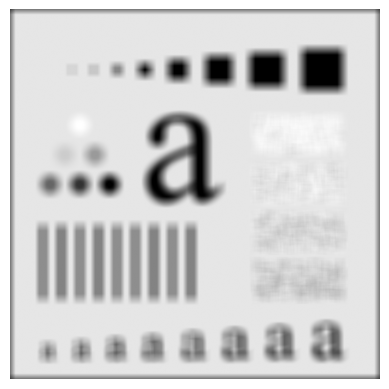

In [188]:
kernel = np.ones((21,21)) 
kernel = kernel / (kernel.shape[0] * kernel.shape[1])  # Rows x Cols = Total number of values as all are ones
m, n = kernel.shape
p_m, p_n = (m - 1) // 2, (n - 1) // 2

padded_image = np.pad(image, p_m) # zero padding

output_image3 = np.zeros_like(image)
rows, cols = image.shape

for row in range(rows):
    for col in range(cols):
        loc_region = padded_image[row: row + m, col: col + n]
        product = kernel * loc_region
        Sum = np.sum(product)
        output_image3[row, col] = Sum

plt.imshow(output_image3, cmap = 'gray')
plt.axis('off')
plt.show()

### Displaying All the images used in Box Kernel so for

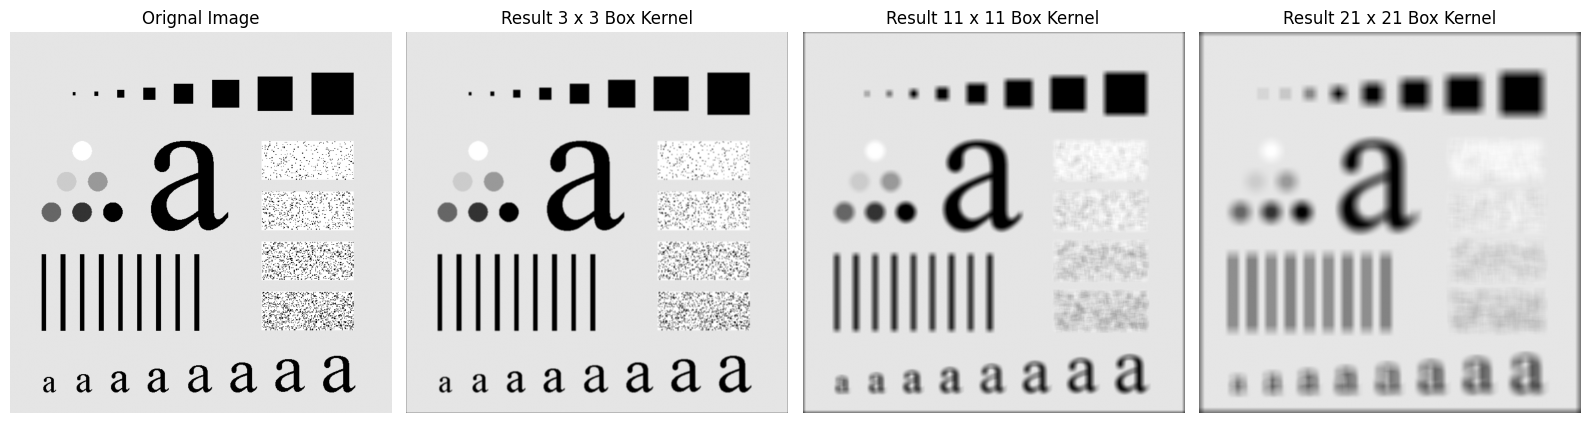

In [189]:
fig, axes = plt.subplots(1, 4, figsize=(16, 6))

# Display the images
axes[0].imshow(image, cmap = 'gray')
axes[0].set_title("Orignal Image")
axes[0].axis('off')

axes[1].imshow(output_image1, cmap = 'gray')
axes[1].set_title("Result 3 x 3 Box Kernel")
axes[1].axis('off')

axes[2].imshow(output_image2, cmap = 'gray')
axes[2].set_title("Result 11 x 11 Box Kernel")
axes[2].axis('off')

axes[3].imshow(output_image3, cmap = 'gray')
axes[3].set_title("Result 21 x 21 Box Kernel")
axes[3].axis('off')


plt.tight_layout()
plt.show()

### Gaussian Filter (Weighted average linear filter)
The filter where nearby pixels have higher weight, and distant pixels have lower weight.<br>
For Image M × N,   Filter m × n:

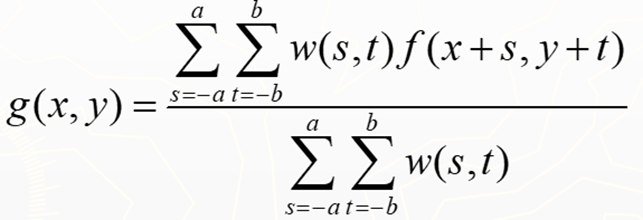


Mathematically, Gaussian filter is;


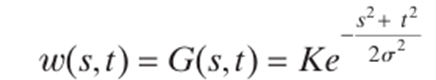


Here, 𝐾 is the scale (i.e., 1 in the Weighted Average, as shown in the upper right figure), and 𝜎 is the standard deviation.

⌈6𝜎⌉ x ⌈6𝜎⌉ can be used for the size of Gaussian kernel <br>
**How to create Guassian Filter?** <br>
We will use the above function to create Gaussian kernel

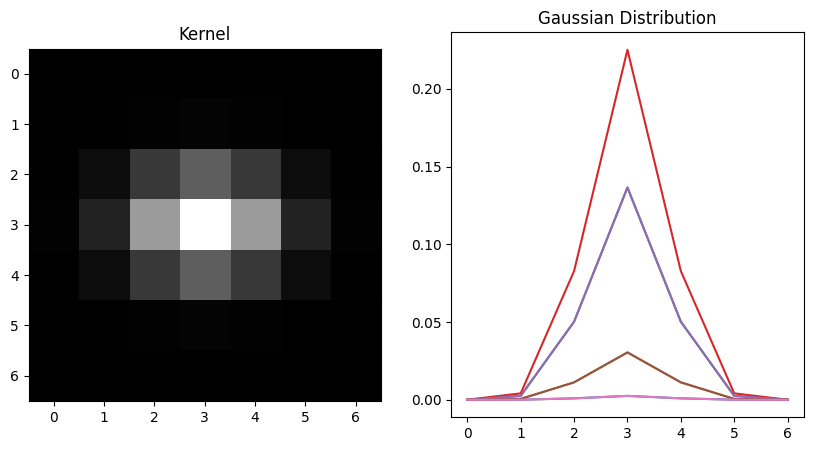

In [15]:
def gaussian_kernel(sigma, K = 1):

    # calculate the size of the kernel
    size = int(np.ceil(6 * sigma))
    
    # Esure odd size
    if not size % 2:
        size += 1

    # Create an empty kernel
    kernel = np.zeros((size, size))

    # Calculate the center of the kernel
    center = size // 2

    # Now fill values in kernel with Gaussian Function
    for x in range(size):
        for y in range(size):
            kernel[x, y] = K * np.exp(- (np.square(x - center) + np.square(y - center) / (2 * np.square(sigma))))

    # Normalize the kernel to make the sum of all elements = 1
    kernel = kernel / np.sum(kernel)
    return kernel

sigma = 1
kernel = gaussian_kernel(sigma)

# Show the kernel and output image
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the kernel
axes[0].imshow(kernel, cmap='gray')
axes[0].set_title("Kernel")

# Display the output image
axes[1].plot(kernel)
axes[1].set_title("Gaussian Distribution")
plt.show()

Now that we have made out our gaussian kernel,now lets apply it on an image. <br>

**Gaussian Kernel with sigma = 3.5**

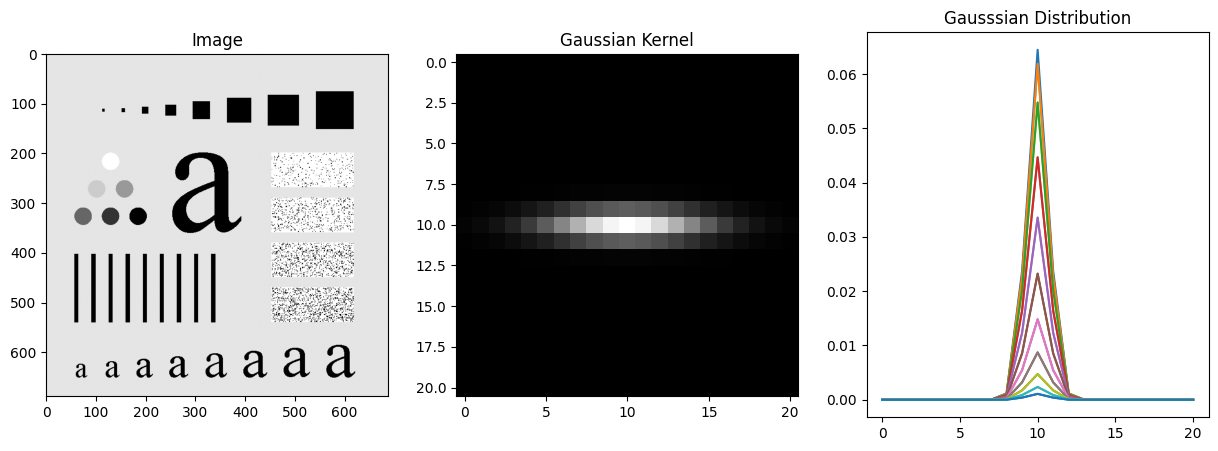

In [ ]:
sigma = 3.5
image = cv2.imread('Fig0237(a)(characters test pattern)_POST.tif', cv2.IMREAD_GRAYSCALE)

kernel = gaussian_kernel(sigma)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Display the image
axes[0].imshow(image, cmap='gray')
axes[0].set_title("Image")
axes[0].axis('off')

# Display the correlation kernel
axes[1].imshow(kernel, cmap='gray')
axes[1].set_title("Gaussian Kernel")
axes[1].axis('off')

# Display the convolution kernel
axes[2].plot(kernel)
axes[2].set_title("Gausssian Distribution")
axes[2].axis('off')

# Show the plot
plt.show()

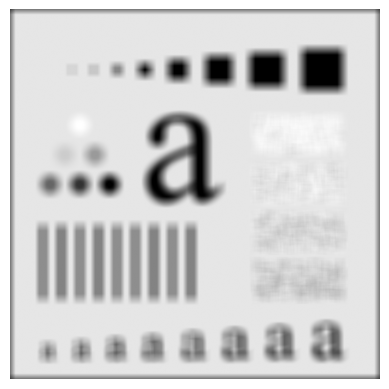

In [190]:
m, n = kernel.shape
p_m, p_n = (m - 1) // 2, (n - 1) // 2

padded_image = np.pad(image, p_m) # zero padding

output_image4 = np.zeros_like(image)
rows, cols = image.shape

for row in range(rows):
    for col in range(cols):
        loc_region = padded_image[row: row + m, col: col + n]
        product = kernel * loc_region
        Sum = np.sum(product)
        output_image4[row, col] = Sum

plt.imshow(output_image4, cmap = 'gray')
plt.axis('off')
plt.show()

**Gaussian Kernel with sigma = 7**

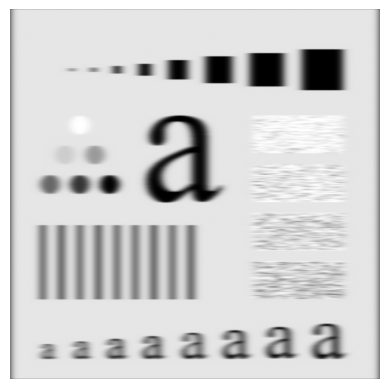

In [194]:
sigma = 7
kernel = gaussian_kernel(sigma)

m, n = kernel.shape
p_m, p_n = (m - 1) // 2, (n - 1) // 2

padded_image = np.pad(image, p_m) # zero padding

output_image5 = np.zeros_like(image)
rows, cols = image.shape

for row in range(rows):
    for col in range(cols):
        loc_region = padded_image[row: row + m, col: col + n]
        product = kernel * loc_region
        Sum = np.sum(product)
        output_image5[row, col] = Sum

plt.imshow(output_image5, cmap = 'gray')
plt.axis('off')
plt.show()

### Displaying All the images used in Gaussian Kernel so for

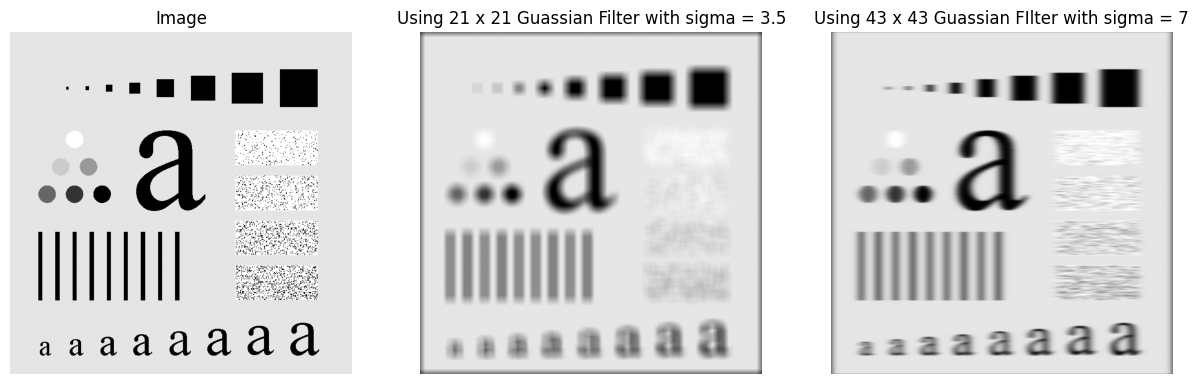

In [195]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Display the image
axes[0].imshow(image, cmap='gray')
axes[0].set_title("Image")
axes[0].axis('off')

# Display the correlation kernel
axes[1].imshow(output_image4, cmap='gray')
axes[1].set_title("Using 21 x 21 Guassian Filter with sigma = 3.5")
axes[1].axis('off')

# Display the convolution kernel
axes[2].imshow(output_image5, cmap = 'gray')
axes[2].set_title("Using 43 x 43 Guassian FIlter with sigma = 7")
axes[2].axis('off')

# Show the plot
plt.show()

### Comparing Box Filter and Gaussian Filter Results

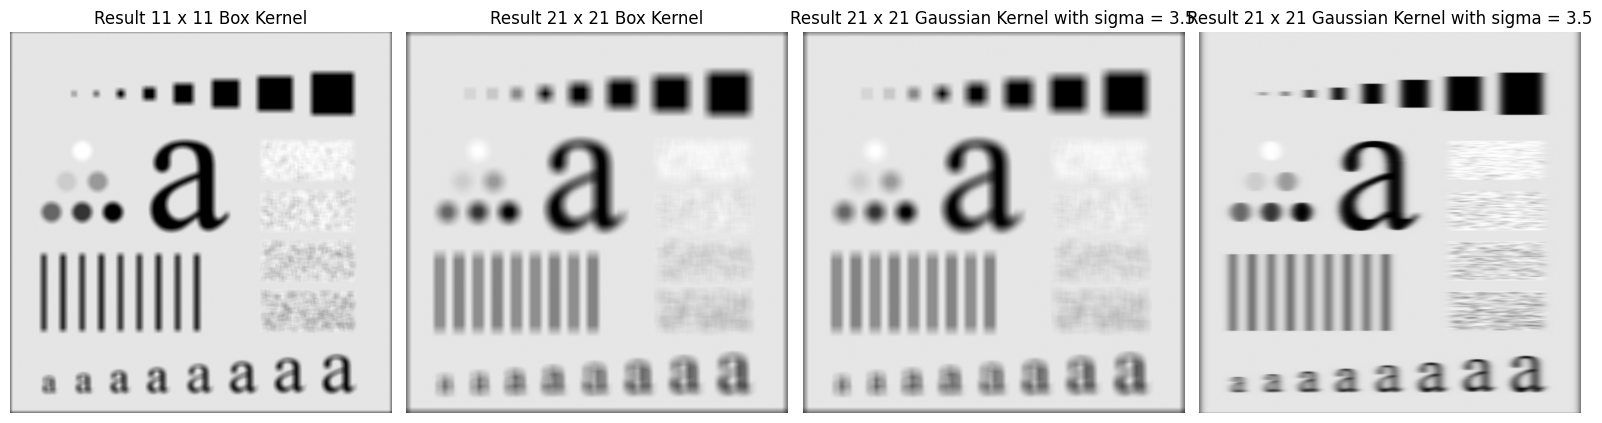

In [196]:
fig, axes = plt.subplots(1, 4, figsize=(16, 6))

# Display the images
axes[0].imshow(output_image2, cmap = 'gray')
axes[0].set_title("Result 11 x 11 Box Kernel")
axes[0].axis('off')

axes[1].imshow(output_image3, cmap = 'gray')
axes[1].set_title("Result 21 x 21 Box Kernel")
axes[1].axis('off')

axes[2].imshow(output_image4, cmap = 'gray')
axes[2].set_title("Result 21 x 21 Gaussian Kernel with sigma = 3.5")
axes[2].axis('off')

axes[3].imshow(output_image5, cmap = 'gray')
axes[3].set_title("Result 21 x 21 Gaussian Kernel with sigma = 3.5")
axes[3].axis('off')


plt.tight_layout()
plt.show()

## Order‑statistic filters (median, min, max) 
* Based on ordering (ranking) the pixels contained in the filter mask
* Replacing the value of the center pixel with the value determined by the ranking result

### Median Filtering
* Assigns the mid value of all the gray levels in the mask to  the center of mask
* Useful in removing impulse noise (also known as salt-and-pepper-noise).


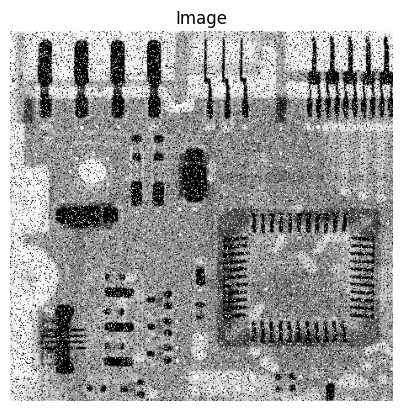

In [13]:
image = cv2.imread('Fig0335(a)(ckt_board_saltpep_prob_pt05).tif', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap = 'gray')
plt.title('Image')
plt.axis('off')
plt.show()

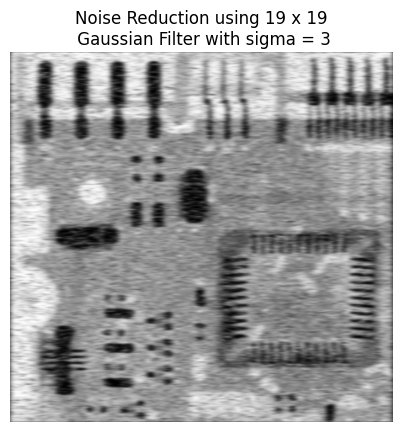

In [20]:
# First we will apply Gaussian or Box Filter to see if it helps in removing the noise.
kernel = gaussian_kernel(sigma = 3)

m, n = kernel.shape
p_m = (m - 1) // 2
p_n = (n- 1) // 2

padded_image = np.pad(image, p_m)

output1 = np.zeros_like(image)
rows, cols = image.shape

for row in range(rows):
    for col in range(cols):
        loc_area = padded_image[row : row + m, col : col + n]
        res = np.sum(loc_area * kernel)
        output1[row, col] = res

plt.imshow(output1, cmap = 'gray')
plt.title('Noise Reduction using 19 x 19\n Gaussian Filter with sigma = 3')
plt.axis('off')
plt.show()

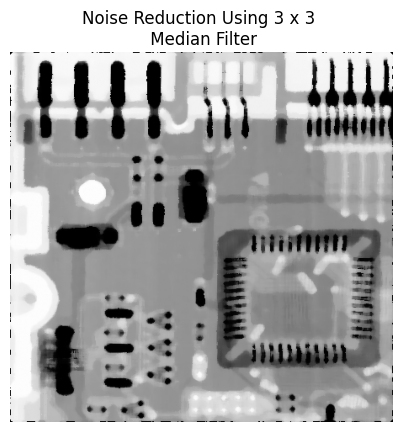

In [27]:
# Now we will apply median filter on the same image.
# For median filter we don't need do define the kernel. We would just need the size of the kernel.
# For example, if we are using 7 x 7 median filter then,

m = 7
n = 7

p_m = (m - 1) // 2
p_n = (n - 1) // 2

padded_image = np.pad(image, p_m)


output2 = np.zeros_like(image)
rows, cols = image.shape

for row in range(rows):
    for col in range(cols):
        loc_area = padded_image[row : row + m, col : col + n]
        oneD = np.ravel(loc_area) # np.ravel() convert the array in 1D
        sorted_vals = np.sort(oneD)
        median = np.median(sorted_vals)
        # median = np.median(np.sort(np.ravel(loc_area))) 
        output2[row, col] = median

plt.imshow(output2, cmap = 'gray')
plt.title("Noise Reduction Using 3 x 3 \n Median Filter")
plt.axis('off')
plt.show()

### Compare Both Resultant Images

In [29]:
# We will create a function so we dont have to write the same code for ploting again and again


import matplotlib.pyplot as plt

def show_results(images, titles=None, cols=4, figsize=(16, 6), cmap='gray'):
    """
    Display multiple images side by side.

    Parameters:
        images (list): List of images to display.
        titles (list, optional): List of titles for each image.
        cols (int, optional): Number of columns in the subplot grid.
        figsize (tuple, optional): Figure size.
        cmap (str, optional): Colormap for displaying grayscale images.
    """
    n = len(images)
    rows = (n + cols - 1) // cols  # Compute rows automatically

    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.ravel()  # Flatten axes for easy iteration

    for i in range(n):
        axes[i].imshow(images[i], cmap=cmap)
        if titles:
            axes[i].set_title(titles[i])
        axes[i].axis('off')

    # Hide unused subplots (if any)
    for i in range(n, rows * cols):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

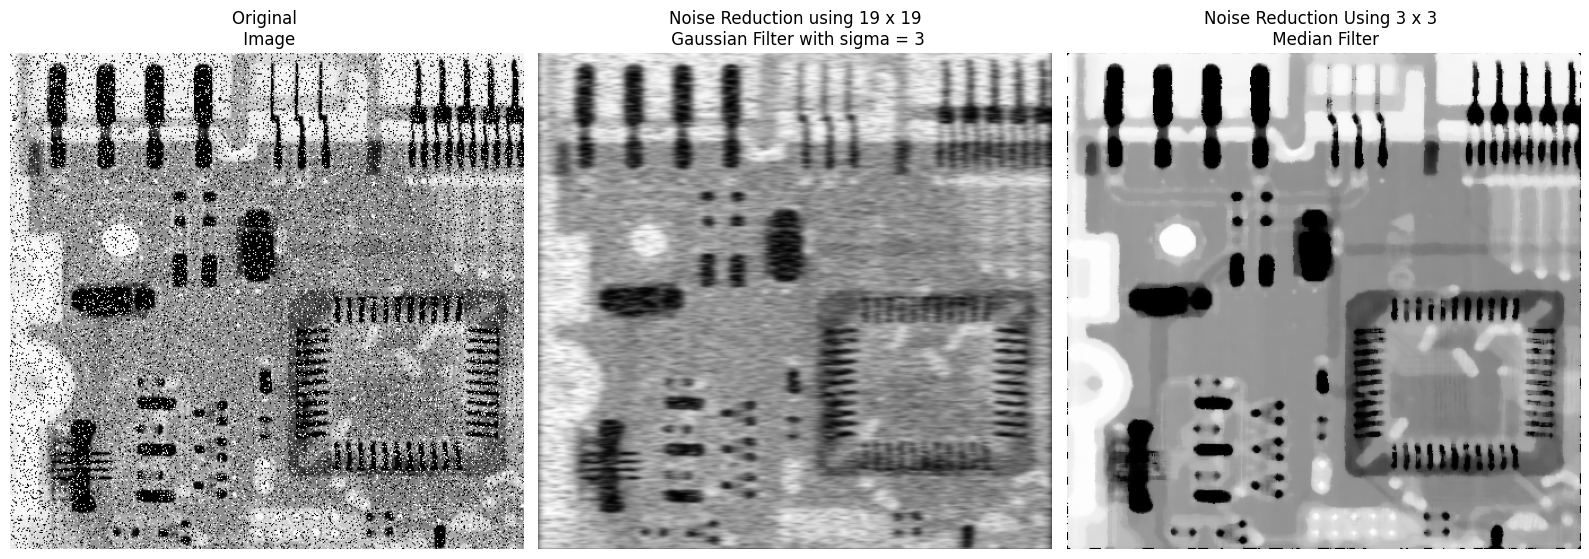

In [30]:
show_results(
    images=[image, output1, output2],
    titles=[
        "Original \n Image",
        "Noise Reduction using 19 x 19\n Gaussian Filter with sigma = 3",
        "Noise Reduction Using 3 x 3 \n Median Filter"
    ],
    cols=3,
    figsize=(16, 6),
    cmap='gray'
)

## Sharpening via spatial differentiation (first & second order)  
### Laplacian (with/without diagonals) & Laplacian sharpening  
* 2D second-order derivative operator used for image sharpening.
* Highlights sharp intensity transitions and de-emphasizes regions with slow intensity changes.
* Produces grayish edge lines and discontinuities on a dark background.


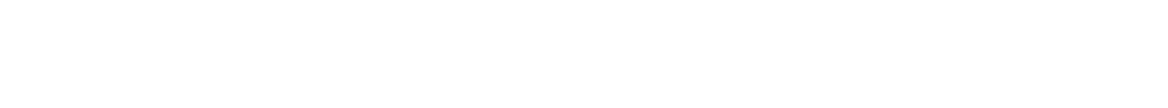


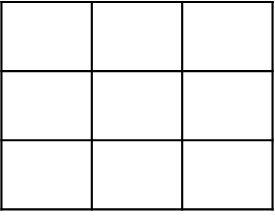

Includes the diagonal terms

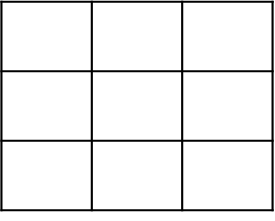

### Using kernel with center = -4

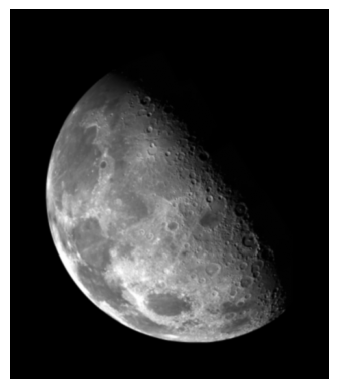

In [114]:
kernel = np.array([
    [0, 1, 0],
    [1,-4, 1],
    [0, 1, 0]
])

image = cv2.imread('moon.tif', cv2.IMREAD_GRAYSCALE)

plt.imshow(image, cmap = 'gray')
plt.axis('off')
plt.show()

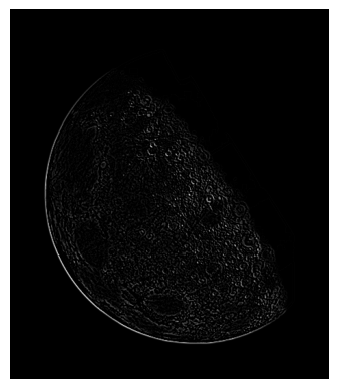

In [107]:
m, n = kernel.shape

p_m, p_n = (m - 1) // 2, (n - 1) // 2

padded_image = np.pad(image, p_n)

lap_image = np.zeros_like(image).astype('int8')

rows, cols = image.shape
for row in range(rows):
    for col in range(cols):
        val = np.sum(kernel * padded_image[row : row + m, col : col + n])
        lap_image[row,col] = val

scaled_lap_image = np.clip(lap_image, 0, 255)
plt.imshow(scaled_lap_image, cmap = 'gray')
plt.axis('off')
plt.show()

Image sharpened using equation

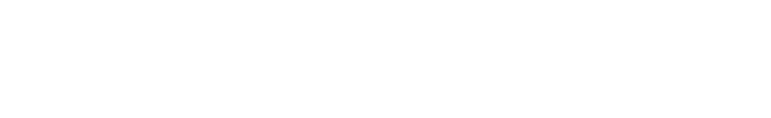

(np.float64(-0.5), np.float64(465.5), np.float64(539.5), np.float64(-0.5))

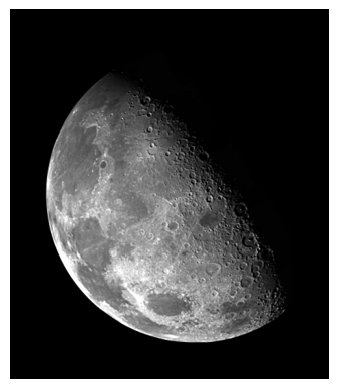

In [115]:
sharpened_image = np.clip(image - lap_image, 0, 255) 
plt.imshow(sharpened_image, cmap = 'gray')
plt.axis('off')

### Using kernel with center = -8

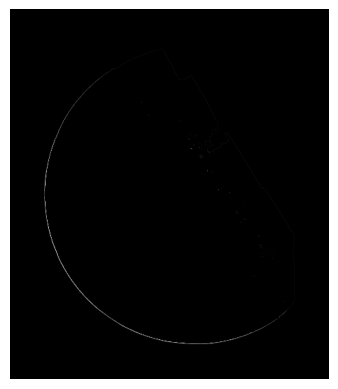

In [117]:
kernel = np.array([
    [0, 1, 0],
    [1,-8, 1],
    [0, 1, 0]
])

m, n = kernel.shape

p_m, p_n = (m - 1) // 2, (n - 1) // 2

padded_image = np.pad(image, p_n)

lap_image2 = np.zeros_like(image).astype('int16')

rows, cols = image.shape
for row in range(rows):
    for col in range(cols):
        val = np.sum(kernel * padded_image[row : row + m, col : col + n])
        lap_image2[row,col] = val

scaled_lap_image2 = np.clip(lap_image2, 0, 255)
plt.imshow(scaled_lap_image2, cmap = 'gray')
plt.axis('off')
plt.show()

(np.float64(-0.5), np.float64(465.5), np.float64(539.5), np.float64(-0.5))

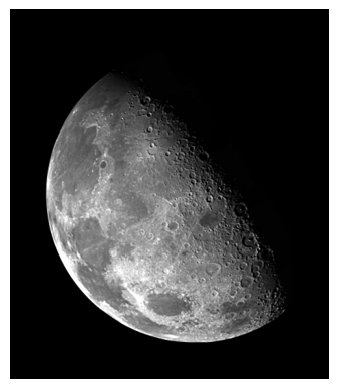

In [118]:
# if don't use clip then
sharpened_image2 = np.clip(image - lap_image, 0, 255) 
plt.imshow(sharpened_image, cmap = 'gray')
plt.axis('off')

#### All the visuals

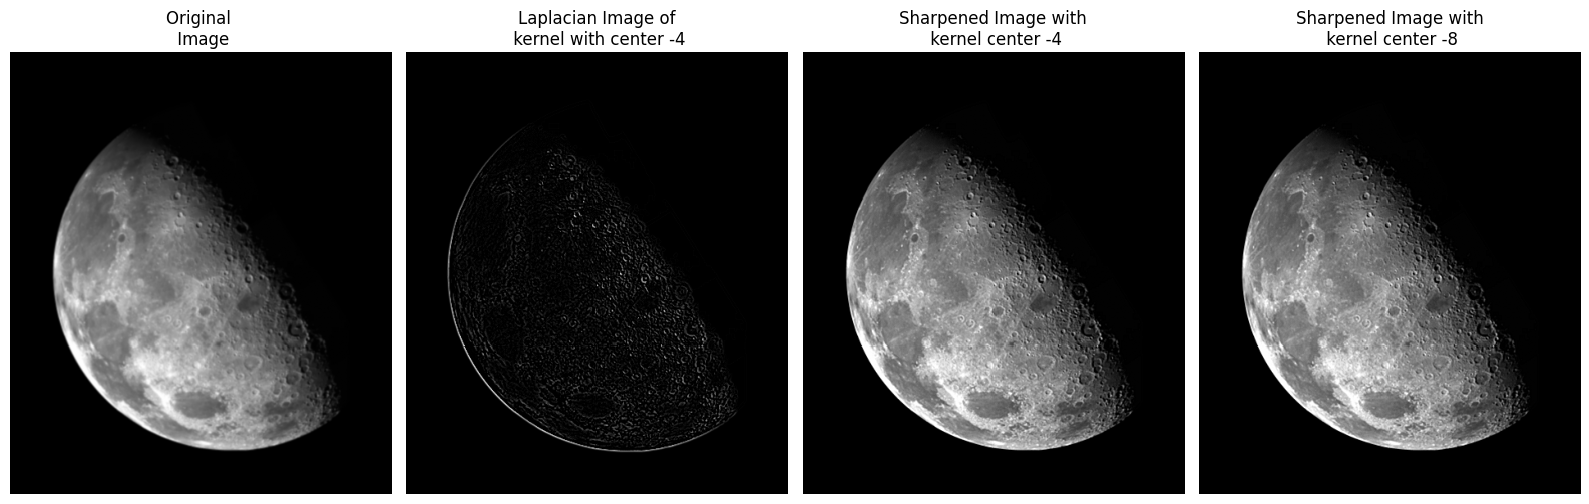

In [119]:
show_results(
    images=[image, scaled_lap_image, sharpened_image, sharpened_image2],
    titles=[
        "Original \n Image",
        "Laplacian Image of\n kernel with center -4",
        "Sharpened Image with\n kernel center -4",
        "Sharpened Image with\n kernel center -8"
    ],
    cols=4,
    figsize=(16, 6),
    cmap='gray'
)

## Gradient‑based edge detection (Roberts, Prewitt, Sobel)
* 2D first derivative (∇𝑓)  in image processing are implemented using the magnitude of the gradient
* The gradient is generally given by

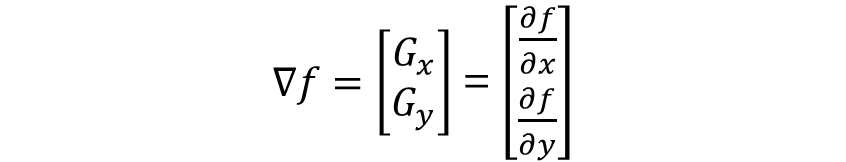

The magnitude is given by

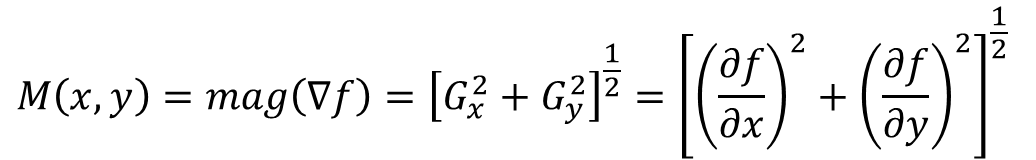

Magnitude is approximated as

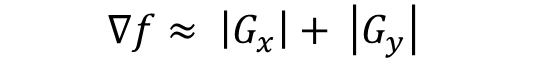

### Prewit Operator

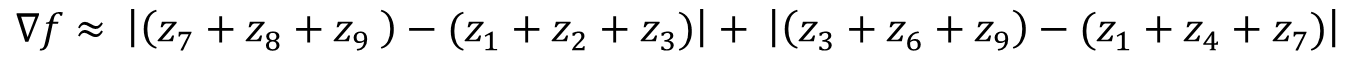

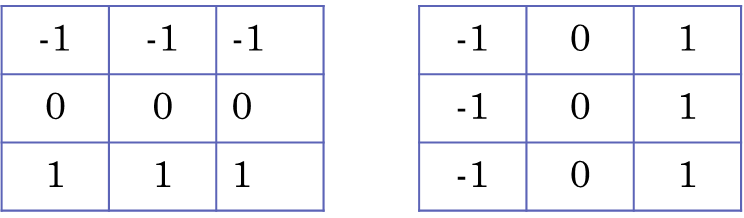

### Sobel Operator

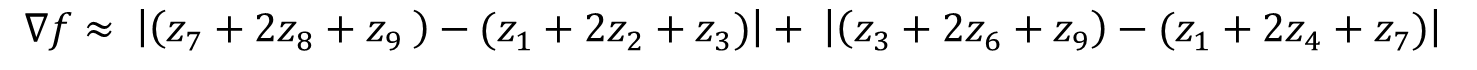

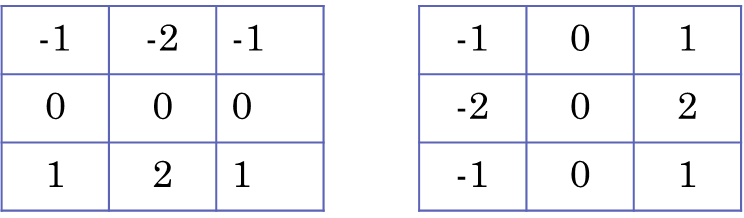

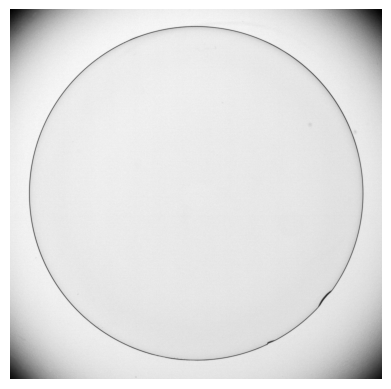

In [ ]:
# Let's apply Sobel kernel on an image
x_kernel = np.array([
    [-1,-2,-1],
    [0, 0, 0],
    [1, 2, 1],
])

y_kernel = np.array([
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]
    ])

image = cv2.imread('Fig0342(a)(contact_lens_original).tif', cv2.IMREAD_GRAYSCALE)

plt.imshow(image, cmap = 'gray')
plt.axis('off')
plt.show()

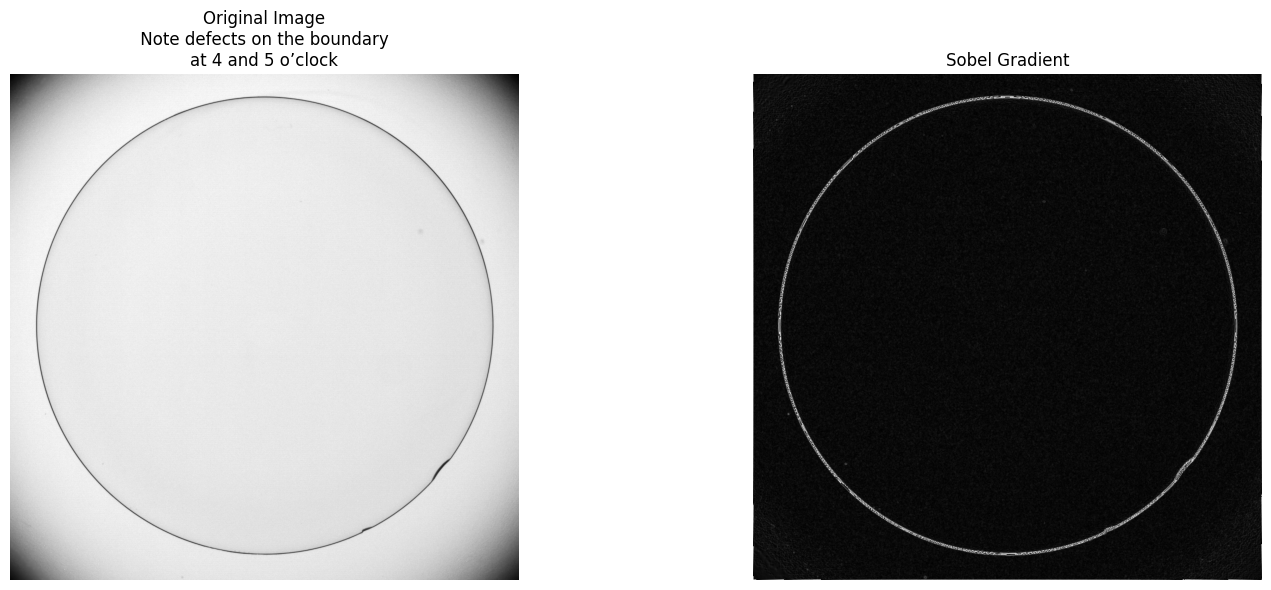

In [102]:
x_m, x_n = x_kernel.shape
y_m, y_n = y_kernel.shape

p_m, p_n = (x_m - 1) // 2, (x_n - 1) // 2

padded_image = np.pad(image, p_m)

sobel_gradient = np.zeros_like(image)
rows, cols = image.shape

for row in range(rows):
    for col in range(cols):
        loc_area = padded_image[row : row + x_m, col : col + x_n]

        g_x = np.sum(x_kernel * loc_area)
        g_y = np.sum(y_kernel * loc_area)

        sobel_gradient[row, col] = np.sqrt(g_x**2 + g_y**2)

show_results(
    images=[image, sobel_gradient],
    titles=[
        "Original Image\n Note defects on the boundary \nat 4 and 5 o’clock",
        "Sobel Gradient",
        
    ],
    cols=2,
    figsize=(16, 6),
    cmap='gray'
)

### Comparing Laplacian And Sobel Kernel Result on same image

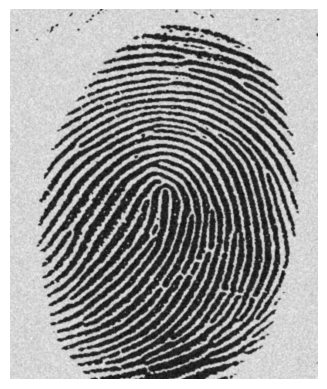

In [121]:
image = cv2.imread('Fig1038(a)(noisy_fingerprint).tif', cv2.IMREAD_GRAYSCALE)

plt.imshow(image, cmap = 'gray')
plt.axis('off')
plt.show()

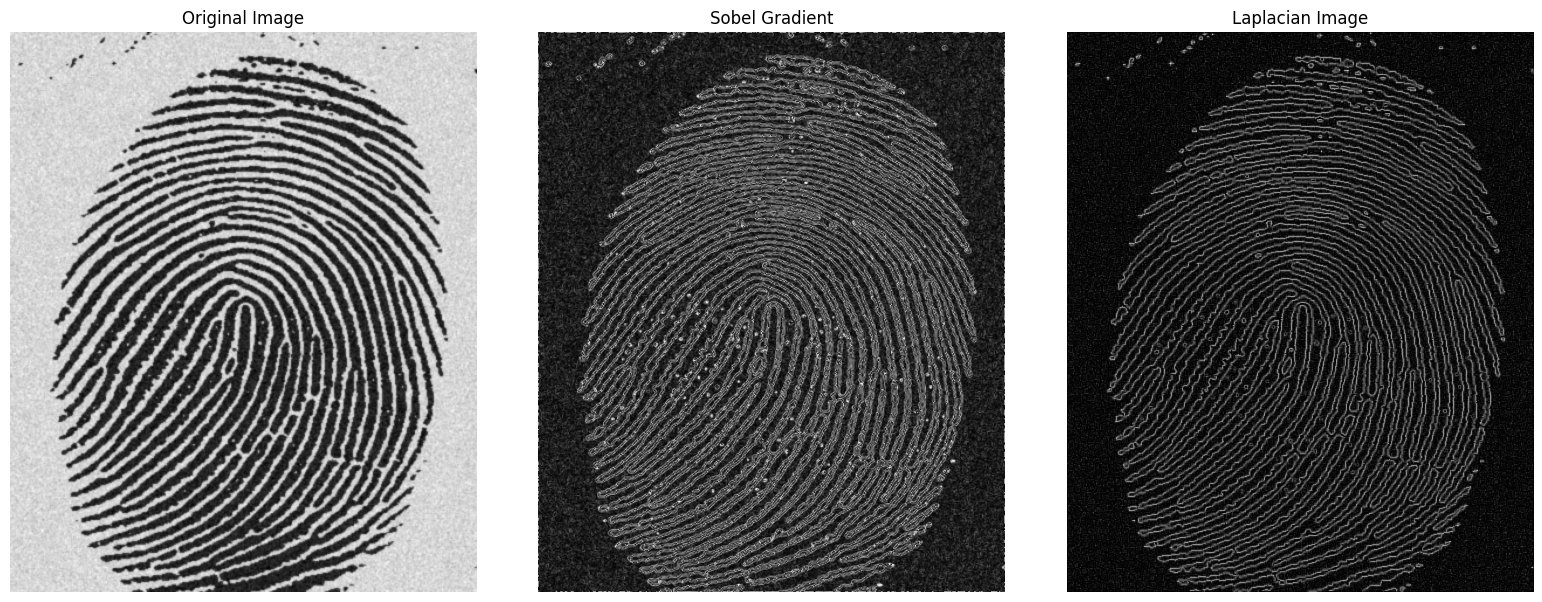

In [ ]:
# Laplacian Filter
lap_kernel = np.array([
    [1, 1, 1],
    [1,-8, 1],
    [1, 1, 1]
])

# Sobel Filter
x_kernel = np.array([
    [-1,-2,-1],
    [0, 0, 0],
    [1, 2, 1],
])

y_kernel = np.array([
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]
    ])

m, y = lap_kernel.shape
x_m, x_n = x_kernel.shape
y_m, y_n = y_kernel.shape

p_m, p_n = (x_m - 1) // 2, (x_n - 1) // 2

padded_image = np.pad(image, p_m)

sobel_gradient = np.zeros_like(image)
lap_image = np.zeros_like(image).astype('int16')

rows, cols = image.shape

for row in range(rows):
    for col in range(cols):
        loc_area = padded_image[row : row + x_m, col : col + x_n]

        g_x = np.sum(x_kernel * loc_area)
        g_y = np.sum(y_kernel * loc_area)
        val = np.sum(lap_kernel * loc_area)

        sobel_gradient[row, col] = np.sqrt(g_x**2 + g_y**2)
        lap_image[row, col] = val

scaled_lap_image = np.clip(lap_image, 0, 255)

show_results(
    images=[image, sobel_gradient, scaled_lap_image],
    titles=[
        "Original Image",
        "Sobel Gradient",
        "Laplacian Image",
        
    ],
    cols=3,
    figsize=(16, 6),
    cmap='gray'
)